In [26]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from haversine import haversine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [28]:
#load dataset
data = pd.read_csv("C:\\Users\\ganes\\OneDrive\\Desktop\\LP3\\uber.csv")

In [29]:
#displaying data
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [31]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [32]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [33]:
data.shape

(200000, 9)

In [34]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [35]:
#preprocessing
#removing null values
data['dropoff_longitude'].fillna(value=data['dropoff_longitude'].mean(), inplace=True)
data['dropoff_latitude'].fillna(value=data['dropoff_latitude'].mean(), inplace=True)

In [36]:
#modifying datetime
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data['hour'] = data.pickup_datetime.dt.hour
data['day'] = data.pickup_datetime.dt.day
data['month'] = data.pickup_datetime.dt.month
data['year'] = data.pickup_datetime.dt.year
data['dayofweek'] = data.pickup_datetime.dt.dayofweek

In [37]:
#modifying columns
data.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1, inplace=True)
data = data[
    (data['pickup_latitude'].between(-90, 90, inclusive=True) &
     data['pickup_longitude'].between(-180, 180, inclusive=True) &
     data['dropoff_latitude'].between(-90, 90, inclusive=True) &
     data['dropoff_longitude'].between(-180, 180, inclusive=True)
    )
]

C:\Users\ganes\AppData\Local\Temp\ipykernel_14672\3558115741.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data['pickup_latitude'].between(-90, 90, inclusive=True) &
C:\Users\ganes\AppData\Local\Temp\ipykernel_14672\3558115741.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['pickup_longitude'].between(-180, 180, inclusive=True) &
C:\Users\ganes\AppData\Local\Temp\ipykernel_14672\3558115741.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['dropoff_latitude'].between(-90, 90, inclusive=True) &
C:\Users\ganes\AppData\Local\Temp\ipykernel_14672\3558115741.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['dropoff_longitude'].between(-180, 180, inclusive=True)


In [42]:
#calculating distance
dist = []
for i, row in data.iterrows():
    coord1 = (row['pickup_latitude'], row['pickup_longitude'])
    coord2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    distance = haversine(coord1, coord2)
    dist.append(distance)

data['distance'] = dist

<AxesSubplot:>

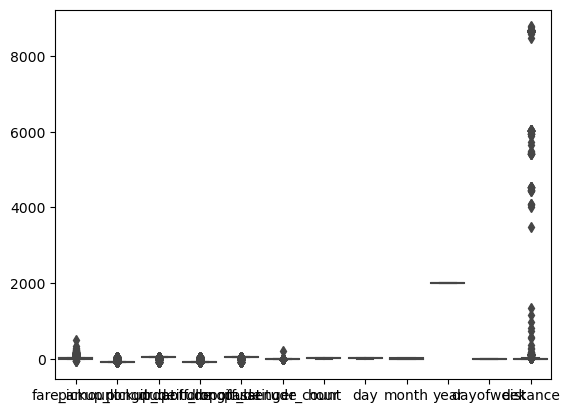

In [43]:
sns.boxplot(data=data)

In [45]:
# Outlier Detection (IQR method)
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

<AxesSubplot:>

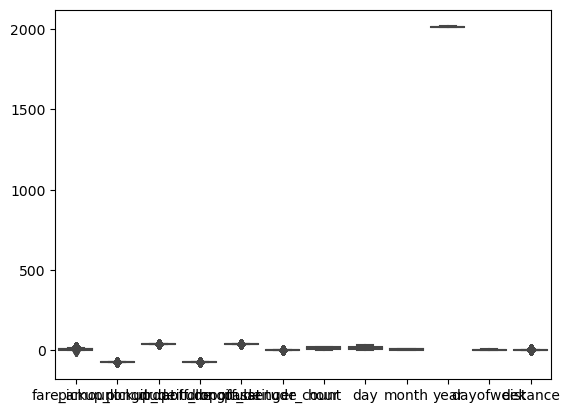

In [46]:
sns.boxplot(data=data)

In [47]:
#check correlation
corr_matrix = data.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance
fare_amount,1.000000,-0.051103,-0.067280,-0.028105,-0.099358,0.019949,0.016920,0.008092,0.034040,0.181041,0.005611,0.768790
pickup_longitude,-0.051103,1.000000,0.684995,0.479122,0.432731,-0.022164,0.013242,-0.004813,-0.002125,-0.002933,-0.037083,-0.046987
pickup_latitude,-0.067280,0.684995,1.000000,0.409443,0.603651,-0.018919,0.033446,-0.002224,0.002790,-0.001831,-0.053924,-0.054465
dropoff_longitude,-0.028105,0.479122,0.409443,1.000000,0.640008,-0.019883,0.003518,-0.010470,-0.004523,0.003419,-0.034493,0.006737
dropoff_latitude,-0.099358,0.432731,0.603651,0.640008,1.000000,-0.016634,0.029709,-0.006788,0.000026,-0.000364,-0.046046,-0.045606
passenger_count,0.019949,-0.022164,-0.018919,-0.019883,-0.016634,1.000000,0.035125,0.000532,0.006733,-0.021542,0.065259,0.013676
hour,0.016920,0.013242,0.033446,0.003518,0.029709,0.035125,1.000000,0.002674,-0.003233,0.005400,-0.076643,0.001254
day,0.008092,-0.004813,-0.002224,-0.010470,-0.006788,0.000532,0.002674,1.000000,-0.017691,-0.009231,0.006327,0.008588
month,0.034040,-0.002125,0.002790,-0.004523,0.000026,0.006733,-0.003233,-0.017691,1.000000,-0.114975,-0.009256,0.006404
year,0.181041,-0.002933,-0.001831,0.003419,-0.000364,-0.021542,0.005400,-0.009231,-0.114975,1.000000,0.007258,-0.002196


In [48]:
# Split the data into training and testing sets
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count','hour','day','month','year','dayofweek','distance']]
y = data['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [50]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [51]:
# Evaluate models
lr_r2 = r2_score(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print("Linear Regression Results:")
print(f"R2 Score: {lr_r2}")
print(f"RMSE: {lr_rmse}")

print("\nRandom Forest Regression Results:")
print(f"R2 Score: {rf_r2}")
print(f"RMSE: {rf_rmse}")

Linear Regression Results:
R2 Score: 0.6336441989088737
RMSE: 2.103764573138168

Random Forest Regression Results:
R2 Score: 0.7196353722183784
RMSE: 1.840378754167259
